In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Definitions
#     1) q = quasi-momentum / laser k
#     2) s is such that V0 = s * Recoil Energy
#     There is overall factor on the hamiltonian, recoil energy E_R, which is not included in below definition

# Auto-generating definition of H
def ham(q, s, dim):
    # Create a matrix with all zeros. We will fill in appropriate term next. 
    H = np.zeros(shape=(dim, dim))
    l_dim = int( (dim-1)/2 )
    
    # Loop through all elements and fill in values depending on l and l_prime values
    for i in range(dim):
        for j in range(dim):
            # calculate l and l_prime for particular i and j
            l = i - l_dim
            l_prime = j - l_dim
            
            # Fill in different values depending on l and l_prime
            if l_prime == l:
                H[i,j] = (q - 2*l)**2
            elif abs(l - l_prime) == 1:
                H[i,j] = - s / 4    
    # return
    return H

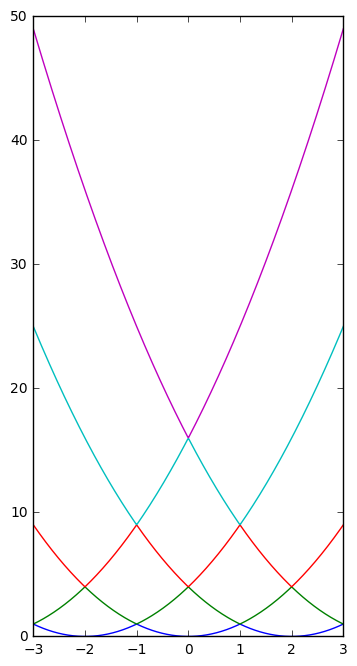

In [12]:
# We want to find eigenvalues as a function of q at a fixed value of s
# Note that q ranges from -1 to 1 in the unitless definition (in the with unit definition, q goes from -k to k for the first briollouine zone)

# Define various parameters
num_points = 500
matrix_dimension = 5  # MUST BE ODD NUMBER

# Let's pick s = 0, the non interaction scenario. 
s_calc = 0

# Generate a q vector
q_vec = np.linspace(-3, 3, num_points)

# There will be 3 eigenvalues, since this is a 3x3 matrix
# We need to create 3 x 100 2D matrix to store all the calculated eigenvalues
ev_vec = np.zeros(shape=(matrix_dimension,num_points))

# Loop through all values of q
for i in range(num_points):
    # get the matrix
    h_matrix = ham(q_vec[i], s_calc, matrix_dimension)
    # Calculate eigenvalues
    eigenvals = np.linalg.eigvals(h_matrix)
    # Order them increasing order
    eigenvals = np.sort(eigenvals)
    # Store these ev_vec
    ev_vec[:,i] = eigenvals


# Change the aspect ratio for the plot
plt.figure(figsize=(4,8))
# Plot, all eigenvalue
for i in range(matrix_dimension):
    plt.plot(q_vec, ev_vec[i,:])